This is the second notebook of this project. in this notebook, the clean data obtain from the notebook on EDA will be used to structure the data further and prepare it for modelling. This note book seek to answer the following questions;

1. Time it took companies to reach unicorn status.
2. What was the maximum, average and minimum number of years each industry took to reach unicorn level.
3. Maximum unicorn company valuation per industry
4. Which unicorn companies have had the biggest returen on investments
5. Which countries have the most unicorns.

In [11]:
# import required libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [12]:
# import the clean dataset in /Data/clean data folder named 'unicorns'

unicorns = pd.read_csv('../Data/Clean data/unicorns.csv')

In [13]:
# display first few rows

unicorns.head()

,Company,Valuation,Date Joined,Industry,City,Country,Continent,Year Founded,Funding,Select Investors,Year Joined
0,Bytedance,$180B,2017-04-07,Artificial intelligence,Beijing,China,Asia,2012,$8B,"Sequoia Capital China, SIG Asia Investments, S...",2017
1,SpaceX,$100B,2012-12-01,Other,Hawthorne,United States,North America,2002,$7B,"Founders Fund, Draper Fisher Jurvetson, Rothen...",2012
2,SHEIN,$100B,2018-07-03,E-commerce & direct-to-consumer,Shenzhen,China,Asia,2008,$2B,"Tiger Global Management, Sequoia Capital China...",2018
3,Stripe,$95B,2014-01-23,Fintech,San Francisco,United States,North America,2010,$2B,"Khosla Ventures, LowercaseCapital, capitalG",2014
4,Klarna,$46B,2011-12-12,Fintech,Stockholm,Sweden,Europe,2005,$4B,"Institutional Venture Partners, Sequoia Capita...",2011


In [14]:
# first, to ease calculations on the valuation, create another column named 'valuation(billions)' using the existing valuation
# column.

unicorns['Valuation(billions)'] = unicorns['Valuation']

# on the new column created, remove the B and $. this is to obtain the valuation as numbers for further analysis

unicorns['Valuation(billions)'] = unicorns['Valuation(billions)'].str.replace('B', '')
unicorns['Valuation(billions)'] = unicorns['Valuation(billions)'].str.replace('$', '')

# change the datatype to 'int'

unicorns['Valuation(billions)'] = unicorns['Valuation(billions)'].astype('int')

# display to verify 

unicorns.head()

,Company,Valuation,Date Joined,Industry,City,Country,Continent,Year Founded,Funding,Select Investors,Year Joined,Valuation(billions)
0,Bytedance,$180B,2017-04-07,Artificial intelligence,Beijing,China,Asia,2012,$8B,"Sequoia Capital China, SIG Asia Investments, S...",2017,180
1,SpaceX,$100B,2012-12-01,Other,Hawthorne,United States,North America,2002,$7B,"Founders Fund, Draper Fisher Jurvetson, Rothen...",2012,100
2,SHEIN,$100B,2018-07-03,E-commerce & direct-to-consumer,Shenzhen,China,Asia,2008,$2B,"Tiger Global Management, Sequoia Capital China...",2018,100
3,Stripe,$95B,2014-01-23,Fintech,San Francisco,United States,North America,2010,$2B,"Khosla Ventures, LowercaseCapital, capitalG",2014,95
4,Klarna,$46B,2011-12-12,Fintech,Stockholm,Sweden,Europe,2005,$4B,"Institutional Venture Partners, Sequoia Capita...",2011,46


In [ ]:
# we have two different spellings for artificial intelligence, correct it
unicorns['Industry'] = unicorns['Industry'].replace('Artificial Intelligence', 'Artificial intelligence')

In [20]:
# create a new column that represent the years each company took to reach unicorn

unicorns['Years_till_unicorn'] = unicorns['Year Joined'] - unicorns['Year Founded'] 

# group the data by industry, get the max, min, and average value in the 'years till unicorn' column

industry_max = (unicorns[['Industry', 'Years_till_unicorn']].groupby('Industry').max().sort_values(by = 'Years_till_unicorn'))

# display

industry_max

,Years_till_unicorn
Industry,
Auto & transportation,14
Travel,14
Artificial intelligence,15
Edtech,17
Hardware,18
Mobile & telecommunications,20
"Supply chain, logistics, & delivery",20
Cybersecurity,21
Internet software & services,21


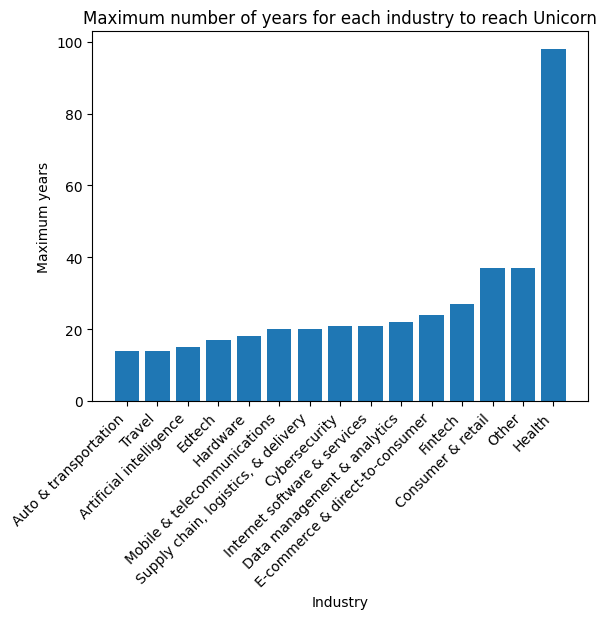

In [21]:
# visualize this information on a graph using industry column as the bar categories and years till unicorn as the height of bars.

plt.bar(industry_max.index, industry_max['Years_till_unicorn'])

# set the title

plt.title('Maximum number of years for each industry to reach Unicorn')

# set x axis

plt.xlabel('Industry')

# set y axis label

plt.ylabel('Maximum years')

# rotate labels on the x axis to avoid overlap

plt.xticks(rotation = 45, horizontalalignment = 'right')

# display the plot

plt.show()

In [44]:

# group the data by industry, get the max, min, and average value in the 'years till unicorn' column

industry_mean = (unicorns[['Industry', 'Years_till_unicorn']].groupby('Industry').mean().sort_values(by = 'Years_till_unicorn'))

# display

industry_mean

,Years_till_unicorn
Industry,
Auto & transportation,5.032258
Artificial intelligence,5.892857
Hardware,5.941176
Mobile & telecommunications,6.315789
E-commerce & direct-to-consumer,6.432432
Fintech,6.544643
Travel,6.571429
Cybersecurity,6.800000
"Supply chain, logistics, & delivery",6.929825


In [42]:
#students[['Age_group','Education level']] .loc[students['Education level']=='University'].value_counts()

#unicorns[['Year Founded', 'Year Joined', 'Years_till_unicorn']].loc[unicorns['Industry'] == 'Mobile & telecommunications'].min()
unicorns[['Years_till_unicorn', 'Year Joined', 'Year Founded']].loc[unicorns['Years_till_unicorn']== -4]

,Years_till_unicorn,Year Joined,Year Founded
714,-4,2017,2021


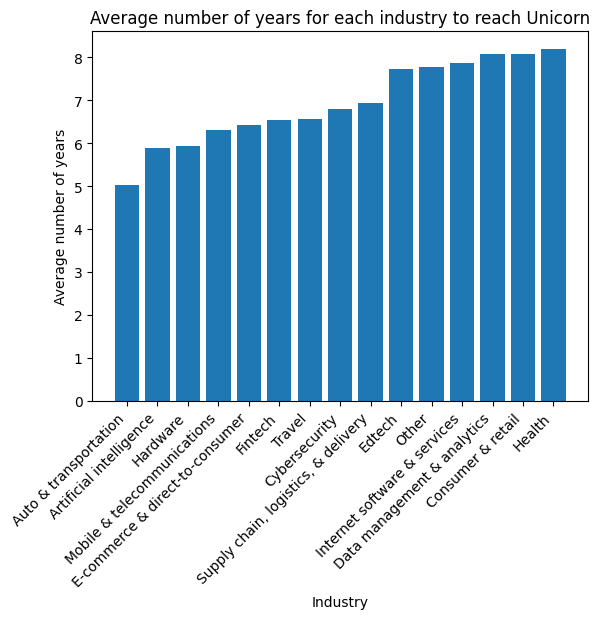

In [45]:
# visualize this information on a graph using industry column as the bar categories and years till unicorn as the height of bars.

plt.bar(industry_mean.index, industry_mean['Years_till_unicorn'])

# set the title

plt.title('Average number of years for each industry to reach Unicorn')

# set x axis

plt.xlabel('Industry')

# set y axis label

plt.ylabel('Average number of years')

# rotate labels on the x axis to avoid overlap

plt.xticks(rotation = 45, horizontalalignment = 'right')

# display the plot

plt.show()

In [52]:
# evaluate max valuation of companies per industry

max_valuation = (unicorns[['Industry', 'Valuation(billions)']].groupby('Industry').max().sort_values(by='Valuation(billions)'))

max_valuation

,Valuation(billions)
Industry,
Cybersecurity,9
Mobile & telecommunications,9
Travel,10
Auto & transportation,11
Hardware,12
Health,13
Edtech,22
Consumer & retail,38
Data management & analytics,38


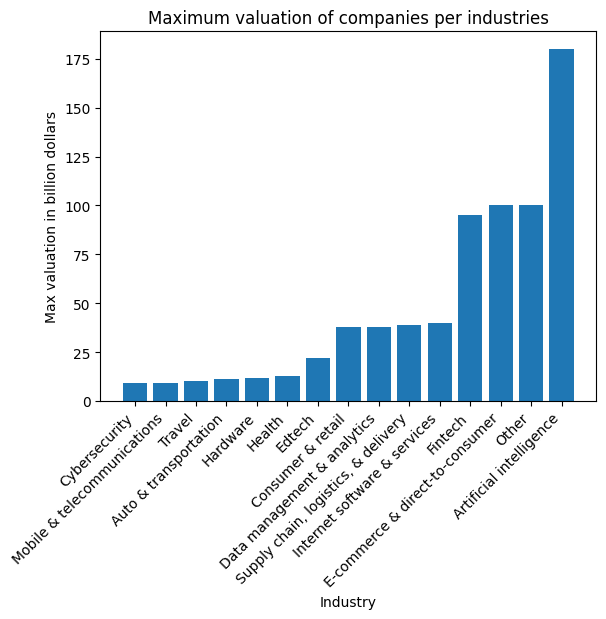

In [56]:
# draw a bar chart to visualize results

# visualize this information on a graph using industry column as the bar categories and years till unicorn as the height of bars.

plt.bar(max_valuation.index, max_valuation['Valuation(billions)'])

# set the title

plt.title('Maximum valuation of companies per industries')

# set x axis

plt.xlabel('Industry')

# set y axis label

plt.ylabel('Max valuation in billion dollars')

# rotate labels on the x axis to avoid overlap

plt.xticks(rotation = 45, horizontalalignment = 'right')

# display the plot

plt.show()

In [71]:
# display 10 unicorn companies with the biggest return on investments

top10 = unicorns[['Company', 'Valuation(billions)', 'Industry']].head(10)
top10

,Company,Valuation(billions),Industry
0,Bytedance,180,Artificial intelligence
1,SpaceX,100,Other
2,SHEIN,100,E-commerce & direct-to-consumer
3,Stripe,95,Fintech
4,Klarna,46,Fintech
5,Canva,40,Internet software & services
6,Checkout.com,40,Fintech
7,Instacart,39,"Supply chain, logistics, & delivery"
8,JUUL Labs,38,Consumer & retail
9,Databricks,38,Data management & analytics


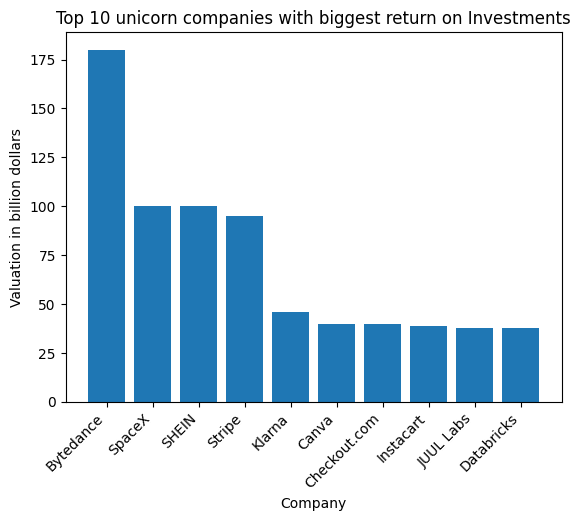

In [75]:
# visualize the top 10 unicorn companies on a bar

plt.bar(x='Company', height='Valuation(billions)', data=top10)

plt.title('Top 10 unicorn companies with biggest return on Investments')
plt.xlabel('Company')
plt.ylabel('Valuation in billion dollars')
plt.xticks(rotation=45, horizontalalignment = 'right')
plt.show()

In [80]:
# display countries with the most unicorns

top101 = unicorns[['Country']].value_counts().head(10)
top101

Country       
United States     562
China             173
India              65
United Kingdom     43
Germany            26
France             24
Israel             20
Canada             19
Brazil             16
South Korea        12
Name: count, dtype: int64

In [85]:
# this code produce same results as above but produce a dataframe which can be easily visualized.

t = pd.crosstab(index=unicorns['Country'], columns='counts').sort_values(by='counts', ascending=False).head(10)
t

col_0,counts
Country,
United States,562
China,173
India,65
United Kingdom,43
Germany,26
France,24
Israel,20
Canada,19
Brazil,16


In [86]:
print(type(t))
print(type(top101))

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>


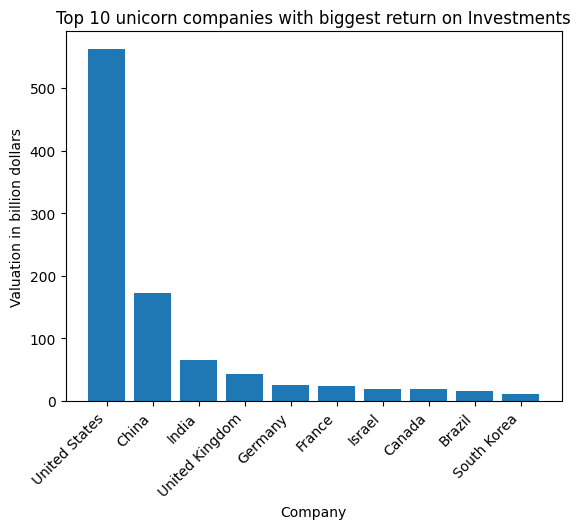

In [89]:
# visualize the top 10 unicorn companies on a bar

plt.bar(t.index, t['counts'])

plt.title('Top 10 unicorn companies with biggest return on Investments')
plt.xlabel('Company')
plt.ylabel('Valuation in billion dollars')
plt.xticks(rotation=45, horizontalalignment = 'right')
plt.show()

In [96]:
unicorns

,Company,Valuation,Date Joined,Industry,City,Country,Continent,Year Founded,Funding,Select Investors,Year Joined,Valuation(billions),Years_till_unicorn
0,Bytedance,$180B,2017-04-07,Artificial intelligence,Beijing,China,Asia,2012,$8B,"Sequoia Capital China, SIG Asia Investments, S...",2017,180,5
1,SpaceX,$100B,2012-12-01,Other,Hawthorne,United States,North America,2002,$7B,"Founders Fund, Draper Fisher Jurvetson, Rothen...",2012,100,10
2,SHEIN,$100B,2018-07-03,E-commerce & direct-to-consumer,Shenzhen,China,Asia,2008,$2B,"Tiger Global Management, Sequoia Capital China...",2018,100,10
3,Stripe,$95B,2014-01-23,Fintech,San Francisco,United States,North America,2010,$2B,"Khosla Ventures, LowercaseCapital, capitalG",2014,95,4
4,Klarna,$46B,2011-12-12,Fintech,Stockholm,Sweden,Europe,2005,$4B,"Institutional Venture Partners, Sequoia Capita...",2011,46,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1069,Zhaogang,$1B,2017-06-29,E-commerce & direct-to-consumer,Shanghai,China,Asia,2012,$379M,"K2 Ventures, Matrix Partners China, IDG Capital",2017,1,5
1070,Zhuan Zhuan,$1B,2017-04-18,E-commerce & direct-to-consumer,Beijing,China,Asia,2015,$990M,"58.com, Tencent Holdings",2017,1,2
1071,Zihaiguo,$1B,2021-05-06,Consumer & retail,Chongqing,China,Asia,2018,$80M,"Xingwang Investment Management, China Capital ...",2021,1,3
1072,Zopa,$1B,2021-10-19,Fintech,London,United Kingdom,Europe,2005,$792M,"IAG Capital Partners, Augmentum Fintech, North...",2021,1,16
